In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [102]:
df = pd.read_csv(r'./insurance.csv')
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [103]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [104]:
df=df.dropna()
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Text(0, 0.5, 'Number of People')

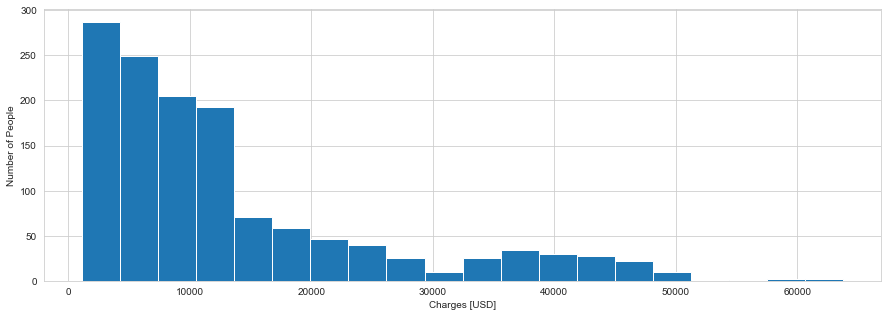

In [107]:
plt.figure(figsize=(15,5))
plt.hist(df.charges,bins=20, range = (df.charges.min(), df.charges.max()))
plt.xlabel('Charges [USD]')
plt.ylabel('Number of People')

Text(0, 0.5, 'Charges [USD]')

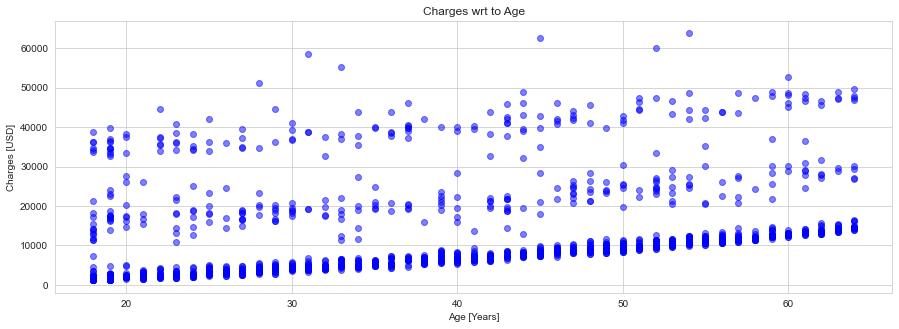

In [108]:
plt.figure(figsize=(15,5))
plt.scatter(df.age, df.charges, c='b', alpha=0.5)
plt.title('Charges wrt to Age')
plt.xlabel("Age [Years]")
plt.ylabel("Charges [USD]")

In [109]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [110]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df2 = df.copy()
df2[['Sex', 'Smoker', 'Region']] = df2[['sex', 'smoker', 'region']].apply(le.fit_transform)
df2[['sex', 'Sex', 'smoker', 'Smoker', 'region', 'Region']] 

,sex,Sex,smoker,Smoker,region,Region
0,female,0,yes,1,southwest,3
1,male,1,no,0,southeast,2
2,male,1,no,0,southeast,2
3,male,1,no,0,northwest,1
4,male,1,no,0,northwest,1
...,...,...,...,...,...,...
1333,male,1,no,0,northwest,1
1334,female,0,no,0,northeast,0
1335,female,0,no,0,southeast,2
1336,female,0,no,0,southwest,3


In [111]:
df2.head(5)

,age,sex,bmi,children,smoker,region,charges,Sex,Smoker,Region
0,19,female,27.900,0,yes,southwest,16884.92400,0,1,3
1,18,male,33.770,1,no,southeast,1725.55230,1,0,2
2,28,male,33.000,3,no,southeast,4449.46200,1,0,2
3,33,male,22.705,0,no,northwest,21984.47061,1,0,1
4,32,male,28.880,0,no,northwest,3866.85520,1,0,1


In [112]:
df3 = df2[['age', 'bmi', 'children', 'charges', 'Sex', 'Smoker', 'Region']]
df3.head(5)

,age,bmi,children,charges,Sex,Smoker,Region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


In [113]:
df4=df.copy()
df4['Sex'] = pd.factorize(df2.Sex)[0]
df4.head()

,age,sex,bmi,children,smoker,region,charges,Sex
0,19,female,27.900,0,yes,southwest,16884.92400,0
1,18,male,33.770,1,no,southeast,1725.55230,1
2,28,male,33.000,3,no,southeast,4449.46200,1
3,33,male,22.705,0,no,northwest,21984.47061,1
4,32,male,28.880,0,no,northwest,3866.85520,1


In [114]:
df4['Smoker'] = pd.factorize(df4.smoker)[0]
df4['Region'] = pd.factorize(df4.region)[0]
df4.head()

,age,sex,bmi,children,smoker,region,charges,Sex,Smoker,Region
0,19,female,27.900,0,yes,southwest,16884.92400,0,0,0
1,18,male,33.770,1,no,southeast,1725.55230,1,1,1
2,28,male,33.000,3,no,southeast,4449.46200,1,1,1
3,33,male,22.705,0,no,northwest,21984.47061,1,1,2
4,32,male,28.880,0,no,northwest,3866.85520,1,1,2


In [115]:
df5 = df4.iloc[: , [0, 2, 3, 7, 8, 9, 6]]
df5.head()

,age,bmi,children,Sex,Smoker,Region,charges
0,19,27.900,0,0,0,0,16884.92400
1,18,33.770,1,1,1,1,1725.55230
2,28,33.000,3,1,1,1,4449.46200
3,33,22.705,0,1,1,2,21984.47061
4,32,28.880,0,1,1,2,3866.85520


In [116]:
df7 = pd.concat([df[['age', 'bmi', 'children', 'charges']], df2[['Sex', 'Smoker', 'Region']]], axis=1)
df7.head(5)

,age,bmi,children,charges,Sex,Smoker,Region
0,19,27.900,0,16884.92400,0,1,3
1,18,33.770,1,1725.55230,1,0,2
2,28,33.000,3,4449.46200,1,0,2
3,33,22.705,0,21984.47061,1,0,1
4,32,28.880,0,3866.85520,1,0,1


### 
# ML - Regression
### 

In [117]:
Y_full = df7.charges
X_full = df7.drop('charges',1)

In [118]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X_full, Y_full, random_state=42)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1003, 6) (1003,) (335, 6) (335,)


In [119]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(X_train, Y_train)

LinearRegression()

In [120]:
pred_Y_train = lreg.predict(X_train)
pred_Y_test = lreg.predict(X_test)

In [121]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
MSE_linear_Train_Data = mean_squared_error(Y_train, pred_Y_train)
MAE_linear_Train_Data = mean_absolute_error(Y_train, pred_Y_train)
print("The Mean Square Error on the training data is:", MSE_linear_Train_Data)
print("The Mean Absolute Error on the training data is:", MAE_linear_Train_Data)
MSE_linear_Test_Data = mean_squared_error(Y_test, pred_Y_test)
MAE_linear_Test_Data = mean_absolute_error(Y_test, pred_Y_test)
print("The Mean Square Error on the testing data is:", MSE_linear_Test_Data)
print("The Mean Absolute Error on the testing data is:", MAE_linear_Test_Data)

The Mean Square Error on the training data is: 37011292.58315399
The Mean Absolute Error on the training data is: 4182.669944366751
The Mean Square Error on the testing data is: 35174149.327053055
The Mean Absolute Error on the testing data is: 4252.8564557923655


Text(0, 0.5, 'Prediction Error')

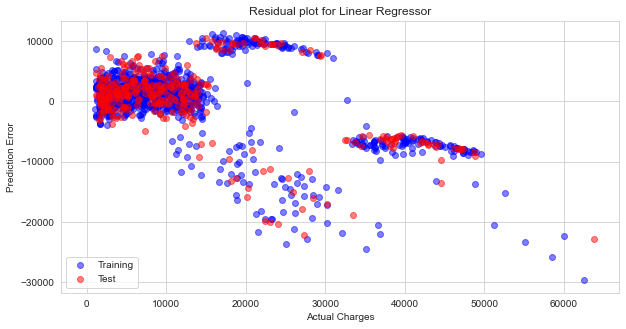

In [122]:
plt.figure(figsize=(10,5))
train = plt.scatter(Y_train, (pred_Y_train-Y_train), c='b', alpha=0.5)
test = plt.scatter(Y_test, (pred_Y_test-Y_test), c='r', alpha=0.5)
plt.hlines(y=0, xmin=-0.5, xmax=0.5)
plt.legend((train, test), ('Training', 'Test'),loc='lower left')
plt.title('Residual plot for Linear Regressor')
plt.xlabel("Actual Charges")
plt.ylabel("Prediction Error")

In [123]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(X_train, Y_train)
rf_pred_train = rf.predict(X_train)
rf_pred_test = rf.predict(X_test)

In [124]:
MSE_rf_Train_Data = mean_squared_error(Y_train, rf_pred_train)
MAE_rf_Train_Data = mean_absolute_error(Y_train, rf_pred_train)
print("Mean Square Error on the training data is:", MSE_rf_Train_Data)
print("Mean Absolute Error on the training data is:", MAE_rf_Train_Data)
MSE_rf_Test_Data = mean_squared_error(Y_test, rf_pred_test)
MAE_rf_Test_Data = mean_absolute_error(Y_test, rf_pred_test)
print("\n" "Mean Square Error on the test data is:", MSE_rf_Test_Data)
print("Mean Absolute Error on the test data is:", MAE_rf_Test_Data)

Mean Square Error on the training data is: 3425241.367419854
Mean Absolute Error on the training data is: 1014.4140113656618

Mean Square Error on the test data is: 22489146.974308692
Mean Absolute Error on the test data is: 2549.9815870607827


Text(0, 0.5, 'Prediction Error')

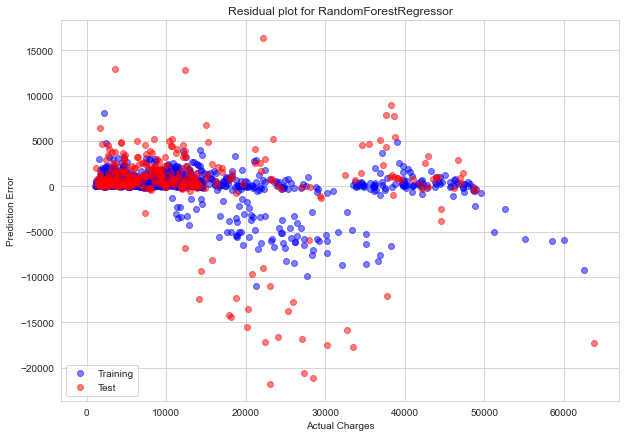

In [125]:
plt.figure(figsize=(10,7))
train = plt.scatter(Y_train, (rf_pred_train-Y_train), c='b', alpha=0.5)
test = plt.scatter(Y_test, (rf_pred_test-Y_test), c='r', alpha=0.5)
plt.hlines(y=0, xmin=-0.5, xmax=0.5)
plt.legend((train, test), ('Training', 'Test'),loc='lower left')
plt.title('Residual plot for RandomForestRegressor')
plt.xlabel("Actual Charges")
plt.ylabel("Prediction Error")

In [126]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, Y_train)
pred_train = svr.predict(X_train)
pred_test = svr.predict(X_test)

In [127]:
MSE_svr_Train_Data = mean_squared_error(Y_train, pred_train)
MAE_svr_Train_Data = mean_absolute_error(Y_train, pred_train)
print("The Mean Square Error on the training data is:", MSE_svr_Train_Data)
print("The Mean Absolute Error on the training data is:", MAE_svr_Train_Data)
MSE_svr_Test_Data = mean_squared_error(Y_test, pred_test)
MAE_svr_Test_Data = mean_absolute_error(Y_test, pred_test)
print("The Mean Square Error on the testing data is:", MSE_svr_Test_Data)
print("The Mean Absolute Error on the testing data is:", MAE_svr_Test_Data)

The Mean Square Error on the training data is: 159518005.18415073
The Mean Absolute Error on the training data is: 8259.648675900147
The Mean Square Error on the testing data is: 165362143.04508358
The Mean Absolute Error on the testing data is: 8468.57683106224


Text(0, 0.5, 'Prediction Error')

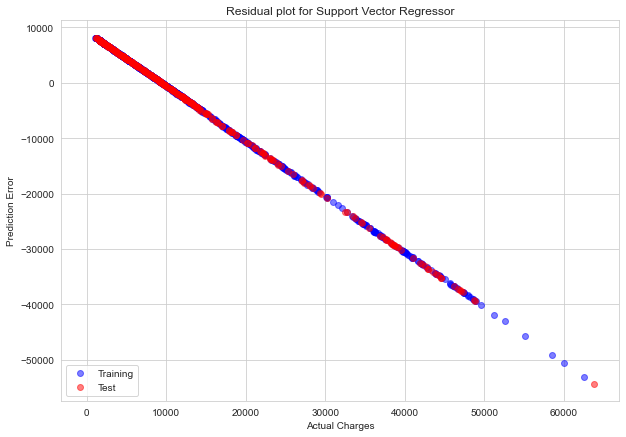

In [128]:
plt.figure(figsize=(10,7))
train = plt.scatter(Y_train, (pred_train-Y_train), c='b', alpha=0.5)
test = plt.scatter(Y_test, (pred_test-Y_test), c='r', alpha=0.5)
plt.hlines(y=0, xmin=-0.5, xmax=0.5)
plt.legend((train, test), ('Training', 'Test'),loc='lower left')
plt.title('Residual plot for Support Vector Regressor')
plt.xlabel("Actual Charges")
plt.ylabel("Prediction Error")

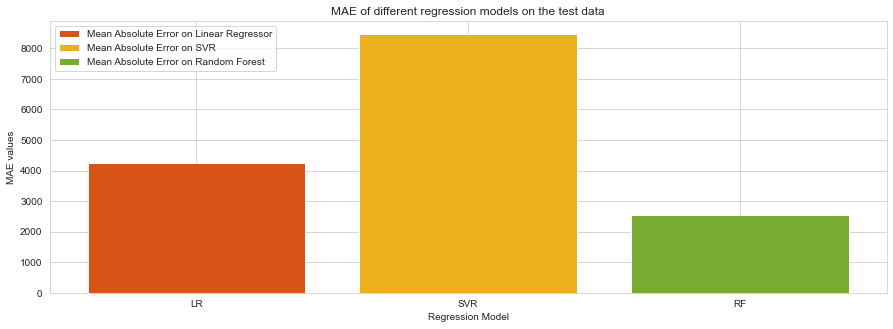

In [129]:
plt.figure(figsize=(15,5))

plt.bar(['LR'],[MAE_linear_Test_Data], color=['#D95319'], label="Mean Absolute Error on Linear Regressor")
plt.bar(['SVR'],[MAE_svr_Test_Data], color=['#EDB120'], label="Mean Absolute Error on SVR")
plt.bar(['RF'],[MAE_rf_Test_Data], color=['#77AC30'], label="Mean Absolute Error on Random Forest")

plt.xlabel('Regression Model')
plt.ylabel('MAE values')
plt.title('MAE of different regression models on the test data')
plt.legend(loc="upper left")
plt.show()

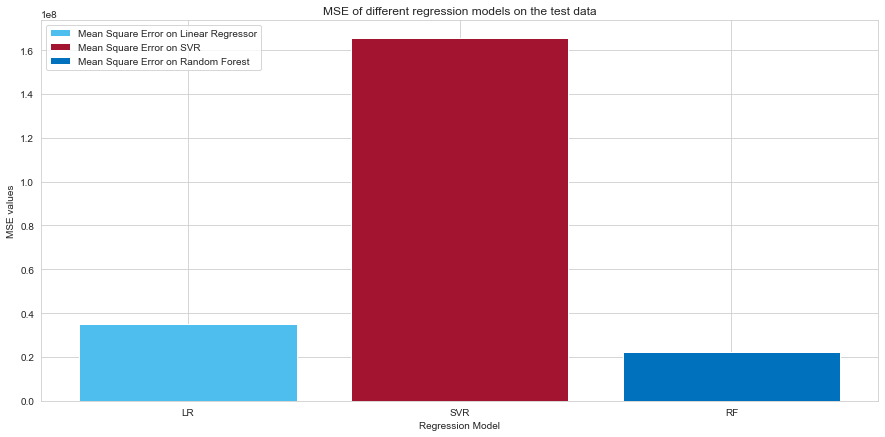

In [130]:
plt.figure(figsize=(15,7))
plt.bar(['LR'],[MSE_linear_Test_Data], color=['#4DBEEE'], label="Mean Square Error on Linear Regressor")
plt.bar(['SVR'],[MSE_svr_Test_Data], color=['#A2142F'], label="Mean Square Error on SVR")
plt.bar(['RF'],[MSE_rf_Test_Data], color=['#0072BD'], label="Mean Square Error on Random Forest")

plt.xlabel('Regression Model')
plt.ylabel('MSE values')
plt.title('MSE of different regression models on the test data')
plt.legend(loc="upper left")
plt.show()

In [131]:
X_test.head()

,age,bmi,children,Sex,Smoker,Region
764,45,25.175,2,0,0,0
887,36,30.020,0,0,0,1
890,64,26.885,0,0,1,1
1293,46,25.745,3,1,0,1
259,19,31.920,0,1,1,1


In [132]:
my_data = pd.DataFrame({
    'age': [29],
    'bmi': [21],
    'children': [0],
    'Sex': [1],
    'Smoker': [0],
    'Region': [2]})
pred_my_charges = rf.predict(my_data)
print("I might be charged", pred_my_charges, "USD")

I might be charged [3717.86865395] USD
